# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 3

Do wykonania laboratorium należy skorzystać z bibliotek:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)

### Zadanie 1 - zakupy

W sklepie dostępne są następujące produkty:

| Produkt | Cena (netto) | Podatek |
| --- | --- | --- |
| Chleb | 3 | 5% |
| Butelka wody (1l) | 2 | 8% |
| Pomidor 1szt. | 2 | 5% |
| Olej (1l) | 6 | 5% |
| Szafran | 1.5 | 8% |
| Krewetki (opakowanie) | 20 | 23% |
| Lód (opakowanie) | 5 | 23% |


#### Zadanie 1 A

- Zapisz nazwy produktów w tablicy `N`.
- Zapisz ceny produktów w tablicy `C`.
- Zapisz podatek w tablicy `P`.

*(tablicy jedno wymiarowej czyli wektorze)*



In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
N = np.array(['Chleb', 'Butelka wody (1l)', 'Pomidor 1szt.', 'Olej (1l)', 'Szafran', 'Krewetki (opakowanie)', 'Lód (opakowanie)'])
C = np.array([3, 2, 2, 6, 1.5, 20, 5])
P = np.array([5, 8, 5, 5, 8, 23, 23])

#### Zadanie 1 B

Klient kupił:

- 2 szt. chleba, 
- 6 butelek wody,
- 1 opakowanie krewetek.

Zapisz zakupy klienta w wektorze `Z` (zachowaj wymiarowość).

In [3]:
Z = np.array([2, 6, 0, 0, 0, 1, 0])


#### Zadanie 1C

Oblicz sumę **netto** jaką klient musi zapłacić bez używania:
- operatora `+`, 
- funkcji/metody `sum`
- operatego mnożenia skalarnego (`*`, `__mul__`).

_Podpowiedź: jeden z wektorów trzeba transponować_

In [4]:
netto = C@Z.T
print(netto)

38.0


#### Zadanie 1D

Oblicz wartość **brutto** jaką klient musi zapłacić w sklepie. W tym zadaniu możesz użyć operatora `*`.

Dodatkowo, wyświetl rachunek w postaci tabeli zawierającą kolumny: 
- nazwa produktu,
- cena netto, 
- liczba sztuk, 
- cena netto danej pozycji (cena netto x liczba sztuk), 
- podatek (procentowo np. `5%`),
- cena brutto danej pozycji. 

Na końcu tabeli ma się wyświetlić suma brutto do zapłaty.

In [5]:
def get_brutto(c, z, p):
    return c @ (z.T * (1 + p.T / 100))

In [6]:
def get_netto_itemwise(c, z):
    return c * z

In [7]:
def get_brutto_itemwise(c, z, p):
    return c * z * (1 + p / 100)

In [8]:
def print_receipt(n, c, p, z):
    brutto = get_brutto(c, z, p)
    brutto_itemwise = get_brutto_itemwise(c, z, p)
    netto_itemwise = get_netto_itemwise(c, z)
    table = np.c_[n, c, z, netto_itemwise, p , np.round(brutto_itemwise, 2)]
    final = ['Suma brutto do zapłaty: ', "", "","", "", np.round(brutto, 2)]
    table = np.concatenate((table, np.array([final])), axis=0)
    columns = ['Nazwa produktu', 'Cena netto', 'Liczba sztuk', 'Cena netto danej pozycji', 'Podatek', 'Cena brutto danej pozycji']
    table = plt.table(cellText=table, colLabels=columns, loc='center')
    table.auto_set_font_size(False)
    table.scale(1,4)
    plt.show()

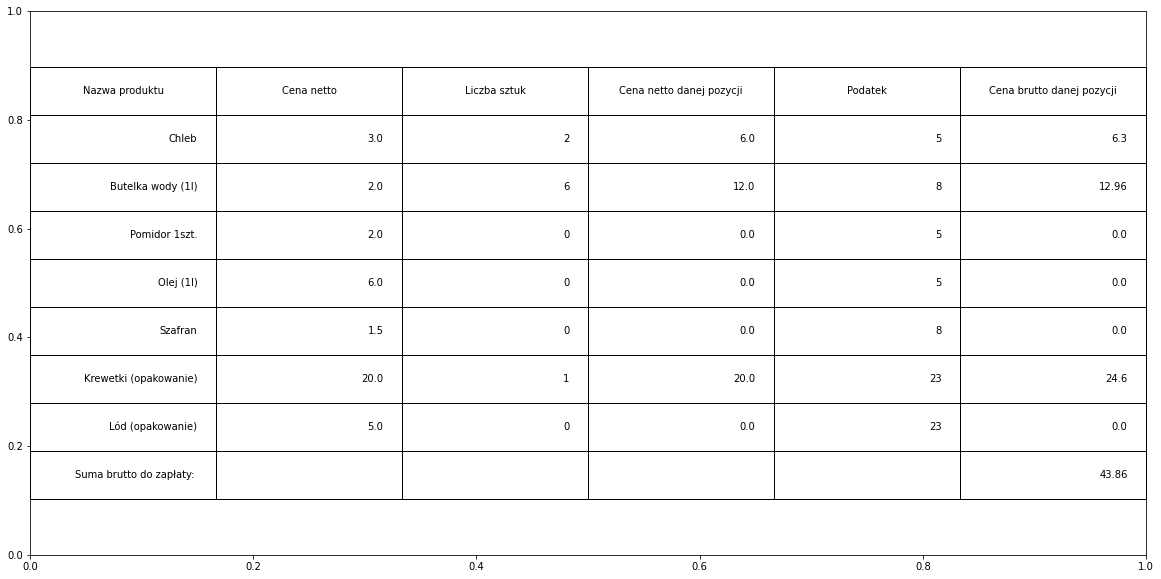

In [9]:
print_receipt(N, C, P, Z)

### Zadanie 2

Zmodyfikuj kod z zadania pierwszego w ten sposób, że dane o produktach będą wczytywane z pliku `produkty.csv` a dane do rachunku (liczba zakupionych produktów) z pliku `rachunek.csv`.

Utwórz przykładowe dane (inne niż w zadaniu 1).

In [10]:

data = np.genfromtxt('produkty.csv', delimiter=',', dtype=str)
N = data[:,0]
C = data[:,1].astype(float)
P = data[:,2].astype(float)

Z = np.genfromtxt('rachunek.csv', delimiter=',')

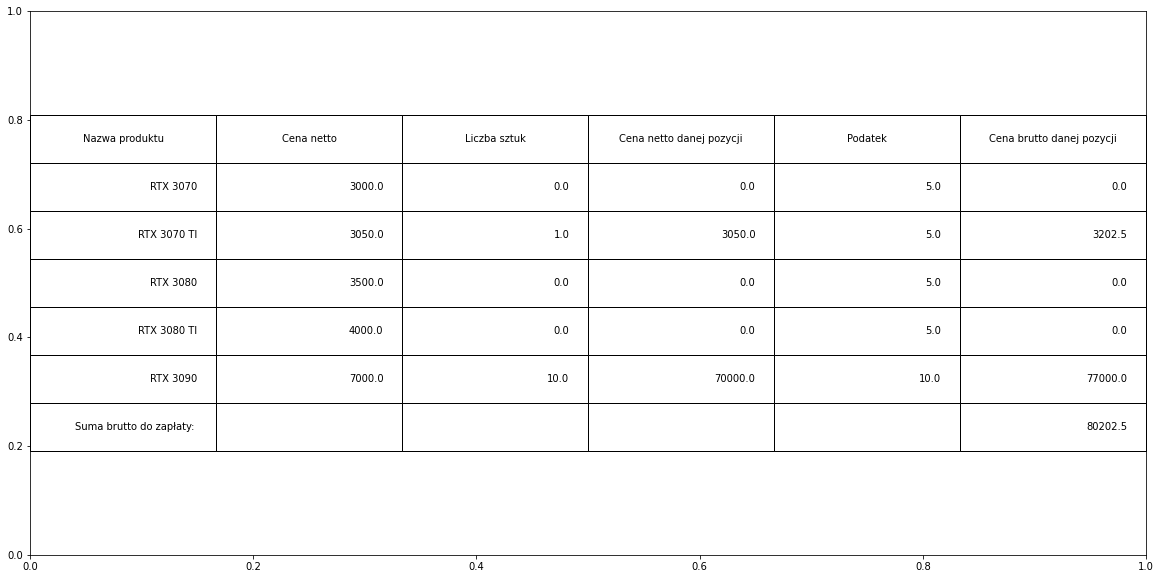

In [11]:
print_receipt(N, C, P, Z)

### Zadanie 3

#### Zadanie 3 A

Utwórz dwa wektory dwuelementowe `A` i `B` (dowolne wartości dodatnie różne od zera).

Następnie wykonaj sumowanie elementów obu wektorów i zapisz w zmiennej `C`.


In [12]:
A = np.array([1, 2])
B = np.array([3, 4])
C = A+B

#### Zadanie 3 B

Wyświetl na wykresie:
- _wektor wodzący_ (strzałkę) z punktu `(0, 0)` do punktów `A` oraz `B` (w kolorze <font color='green'>zielonym</font>),
- _wektor wodzący_ (strzałkę) z punktu `(0, 0)` do punktu `C` (w kolorze <font color='red'>czerwonym</font>)
- wektor wodzący z punktu `A` do punktu `C` (w kolorze <font color='blue'>niebieskim</font>),
- wektor wodzący z punktu `B` do punktu `C` (w kolorze <font color='blue'>niebieskim</font>).

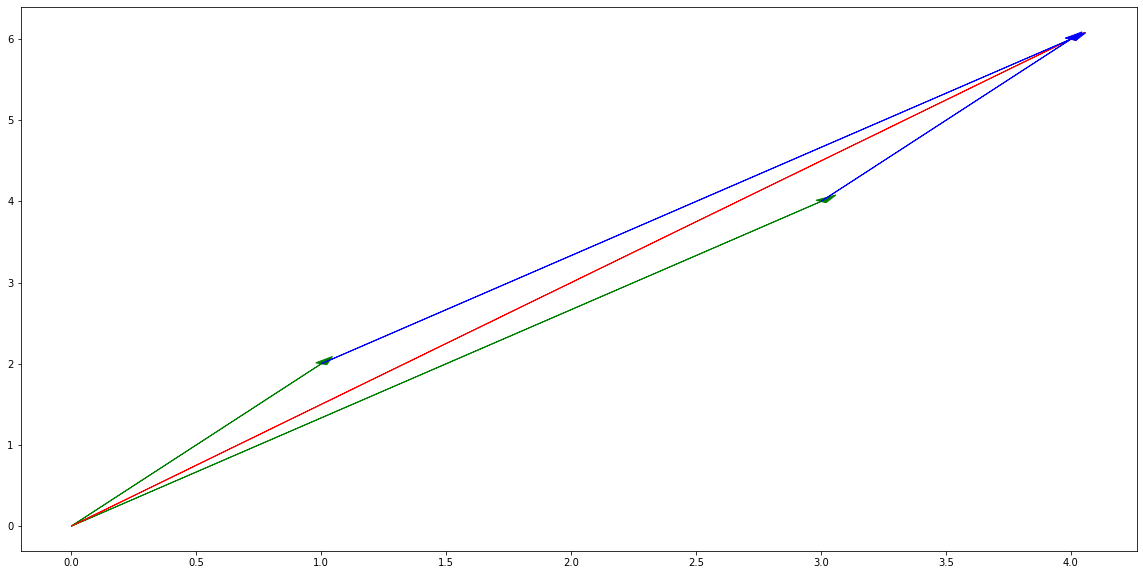

In [13]:
plt.arrow(0, 0, A[0], A[1], head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.arrow(0, 0, B[0], B[1], head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.arrow(0, 0, C[0], C[1], head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.arrow(A[0], A[1], C[0]-A[0], C[1]-A[1], head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(B[0], B[1], C[0]-B[0], C[1]-B[1], head_width=0.05, head_length=0.1, fc='b', ec='b')

plt.show()

### Zadanie 4

Wygeneruj losową macierz 8×8 wg rozkładu Gaussa (średnia: 100, odch. std = 15),
wartości zaokrąglij do liczb całkowitych (int). Macierz ta reprezentuje pewien obraz (w skali szarości).

Następnie zastosuj filtr uśredniający o masce 3×3 dla elementów wewnętrznych (tj. poza brzegiem) tej macierzy i wypisz wynik. W filtrze uśredniającym zastosuj zaokrąglanie w dół do liczby całkowitej.

_Podpowiedź: generacja danych: np.random.normal, np.round._

In [14]:
mat = np.random.normal(100, 15, (8, 8)).astype(int)
print(mat)

[[125  96 125 106  99 135  93  74]
 [101  90  81 102 134  73 107  99]
 [109 109  93  95 104  87  99 100]
 [105  77  72 125 108 112  92 108]
 [ 95  78 119 119  95 104 100 125]
 [ 99  86 105  79  99  89 107  93]
 [107 102 108  84  84  92 109  72]
 [104  97  96  87  89  98  95  93]]


In [15]:
filtered = np.zeros((6,6), dtype=int)
for i in range(1, mat.shape[0]-1):
    for j in range(1, mat.shape[1]-1):
        filtered[i-1, j-1] = np.floor(np.average([
            mat[i-1, j-1],
            mat[i-1, j],
            mat[i-1, j+1],
            mat[i, j-1],
            mat[i, j],
            mat[i, j+1],
            mat[i+1, j-1],
            mat[i+1, j],
            mat[i+1, j+1]
        ]))
print(filtered)

[[103  99 104 103 103  96]
 [ 93  93 101 104 101  97]
 [ 95  98 103 105 100 103]
 [ 92  95 102 103 100 103]
 [ 99  97  99  93  97  99]
 [100  93  92  89  95  94]]
